# House Price Prediction Project

This project aims to predict house prices using a linear dataset and various algorithms. By analyzing key features such as property size, location, and the number of bedrooms, we can offer accurate predictions for real estate values. This project showcases the practical application of data science and machine learning in the real estate market, providing valuable insights for both buyers and sellers.

### Importing Libraries

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Loading Dataset

Dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [185]:
df=pd.read_csv(r"C:\Users\babua\OneDrive\Desktop\house price\Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [186]:
df.shape

(13320, 9)

In [187]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [188]:
df.nunique

<bound method DataFrame.nunique of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056  

### Data Cleaning

In [189]:
#Removing columns that do not significantly contribute to price prediction
df1=df.drop(['area_type','availability','society','balcony'],axis=1)
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [190]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [191]:
#removing null values 
df1=df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [192]:
df1.shape

(13246, 5)

In [193]:
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [194]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [195]:
#making a new column  by removing strings in size column and converting it into integers
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0])) 
df1.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [196]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [197]:
#converting d_type to float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [198]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


here we are going to replace the ranges (for example :2100 - 2850) like this with there avrege of min and max values and going to remove others ( eg:4125Perch).

In [199]:
def avg(x):
    token=x.split('-')
    if token==2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [200]:
df2=df1.copy()
df2['total_sqft']=df2['total_sqft'].apply(avg)
df2=df2[df2['total_sqft'].notnull()]
df2.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### Data Exploration

In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13056 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13056 non-null  object 
 1   size        13056 non-null  object 
 2   total_sqft  13056 non-null  float64
 3   bath        13056 non-null  float64
 4   price       13056 non-null  float64
 5   bhk         13056 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 714.0+ KB


In [202]:
df2.describe()

,total_sqft,bath,price,bhk
count,13056.000000,13056.000000,13056.000000,13056.000000
mean,1554.458192,2.691942,112.508062,2.805300
std,1238.479835,1.336034,149.687320,1.293624
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1670.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [203]:
df2.nunique()

location      1298
size            31
total_sqft    1894
bath            19
price         1838
bhk             19
dtype: int64

### Feature Engineering

In [204]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [205]:
# adding new column price per square feet
df2['price_per_sqft']=(df2['price']*100000)/df2['total_sqft']
df2.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Redusing dimension of Categorical variable Location before encoding 

In [206]:
len(df2.location.unique())

1298

In [207]:
df2.location=df2.location.apply(lambda x: x.strip())
loc_stat=df2.location.value_counts(ascending=False)
loc_stat

location
Whitefield                   518
Sarjapur  Road               386
Electronic City              304
Kanakpura Road               260
Thanisandra                  225
                            ... 
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Subramanyanagar                1
1 Ramamurthy Nagar             1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

from here we can change  locations with value count less than ten to a category called other

In [208]:
df2['location']=df2['location'].apply(lambda x:'other' if x in loc_stat[loc_stat<=10] else x)


In [209]:
len(df2.location.unique())

240

here we reduced the overall length of location from 1298 to 240

### Outlier Removal

Based on buisness logic
here we are going to take square feet based on bhk and going to remove all rows with unsuitable values(for example for 1bhk the minimum square feet is 300 if we found  a 2bhk in this square feet we can remove it)


In [210]:
df2[df2.total_sqft/df2.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


here we can see unsuitable square feet with respect to bhk so we can remove all this

In [211]:
df2.shape

(13056, 7)

In [212]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]

In [213]:
df3.shape

(12312, 7)

Removing Outliers on basis of Mean and Standard deviation

In [214]:
df3.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [215]:
def outlier_remove(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        rdf=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,rdf],ignore_index=True)
    return df_out
df4=outlier_remove(df3)
df4.shape
    

(10146, 7)

Removing outliers based on number of bathroom and bedroom

In [216]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

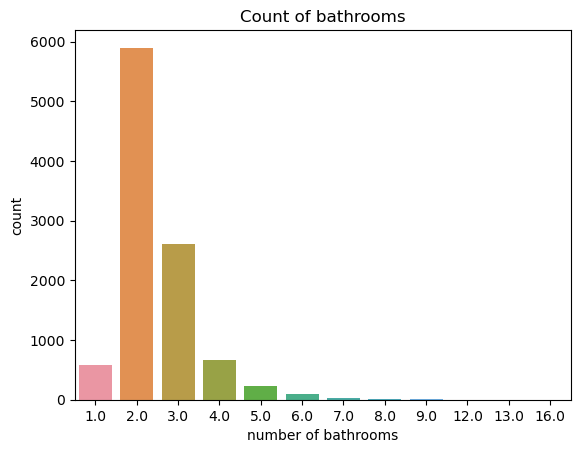

In [217]:
sns.countplot(x='bath',data=df4)
plt.xlabel("number of bathrooms")
plt.ylabel("count")
plt.title("Count of bathrooms")
plt.show()


In [218]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5217,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8384,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8473,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9209,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424



Removing bathrooms that exceed the available bedroom count

In [219]:
df5=df4[df4.bath<df4.bhk+2]
df5.shape

(10062, 7)

### Treating Categorical values

#### One Hot Encoding

In [220]:
df5=df4.copy()
ohe=OneHotEncoder(sparse_output=False)
df5=ohe.fit_transform(df5[['location']])
feature_name=ohe.get_feature_names_out(['location'])

In [221]:
df5=pd.DataFrame(df5,columns=feature_name)
df6=df4.join(df5)
df6.columns = df6.columns.str.replace('location_', '')
df6.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


now we can remove location and price per sqft and size column for model building

In [222]:
df7=df6.drop(['location','price_per_sqft','size'],axis=1)

In [223]:
df7.head(4)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building ML Model

#### Importing necessary libraries

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [225]:
#spliting training and testing data
X=df7.drop('price',axis=1)
y=df7['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Finding Best Model

In [226]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
knn=KNeighborsRegressor()
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


grid_cv={'LinearRegression':lr,'DecisionTreeRegressor':dt,'RandomForestRegressor':rf,'AdaBoostRegressor':ada,'GradientBoostingRegressor':gb,
       'KNeighborsRegressor':knn }
print ("r2_score")
for regressor_name,regressor in grid_cv.items():
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score=r2_score(y_pred,y_test)
    print(regressor_name,' : ',score*100)
    

r2_score
LinearRegression  :  83.59962849180218
DecisionTreeRegressor  :  73.71327284572806
RandomForestRegressor  :  81.55010002457446
AdaBoostRegressor  :  67.38088463617531
GradientBoostingRegressor  :  81.6534219903029
KNeighborsRegressor  :  63.66270014373114


Linear Regression and Random Forest Regression have the highest R2 scores, indicating strong performance in explaining the variance in the data, while K-Neighbors Regression has the lowest score, suggesting weaker performance.

In [227]:
#measuring accuracy using k fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
X.columns = X.columns.astype(str)
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=5)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85182459, 0.80026718, 0.80200607, 0.78028919, 0.80285495])

In [228]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

array([ 49.37606395,  57.82896646, 133.12350401, ..., 326.35817278,
       265.34381624, 119.60473552])

In [229]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=243)

### Testing 

In [230]:
def predict(sqft,bath,bhk,location):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [232]:
predict(1000,2,3,'Yeshwanthpur')

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.78228470658132

In [233]:
predict(2000,3,5,'Whitefield')

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.55772536914718

In [234]:
predict(3000,4,4,'JP Nagar')

C:\Users\babua\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.34172875034517